<a href="https://colab.research.google.com/github/Nishidh25/IEEE-Coders-Week---ML/blob/master/Day%203/Mushrooms_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created on Wed Jun 03 15:30:04 2020

@author: Nishidh Shekhawat

Downloading the dataset - Mushroom Classification

In [1]:
!wget http://iali.in/datasets/mushrooms.csv

--2020-06-03 11:02:54--  http://iali.in/datasets/mushrooms.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv.2’

mushrooms.csv.2     100%[===================>] 365.24K   312KB/s    in 1.2s    

2020-06-03 11:02:56 (312 KB/s) - ‘mushrooms.csv.2’ saved [374003/374003]



# Imports

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Loading dataset into a dataframe

In [0]:
df = pd.read_csv('mushrooms.csv')

# Understanding the data

In [4]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Label Enoding

In [0]:
labelencoder = LabelEncoder()
# Encoding every column 
for column in df.columns:
  df[column] = labelencoder.fit_transform(df[column])

In [7]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1


In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Data in veil-type column is useless so dropping it

In [0]:
df = df.drop(["veil-type"],axis=1)

# Splitting dataframe into Input data and labels

In [0]:
X = df.drop(['class'], axis=1) # Input Data
Y = df['class'] # Labels

# Splitting the dataset into the Training set and Test set
75% training , 25% Test

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Standardize Data / Feature scaling

In [12]:
# Standard Scaler  z = (x - u) / s , data mean becomes 0 , 68% values [-1, 1]

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# For visualization
print("X Train : ", X_train[:1])
print("X Train : ", X_test[:1])

X Train :  [[-0.84654963  0.9504593   1.79845965 -0.8420905  -1.0367657   0.15778108
  -0.44045832 -0.67366879  0.61563494 -1.14825657 -0.10955511 -0.91793374
  -0.89126531 -3.05061536 -0.94758559  0.13592587 -0.25771163 -0.15070459
  -1.09502697  1.07975868 -0.29613015]]
X Train :  [[ 1.03000635  0.9504593  -0.18431722  1.18752082  0.8771908   0.15778108
  -0.44045832  1.48440898  0.61563494 -1.14825657  1.76286927  0.68326016
   0.5864162   0.62112512  0.62919338  0.13592587 -0.25771163  0.95694689
  -0.67527237 -0.50610841  2.02155899]]


# Building Models 


# 1. Using Logistic Regression

In [13]:
model_lr = LogisticRegression(random_state = 0, solver='lbfgs')
model_lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Metrics : Classification Accuracy

In [14]:
acc_lr = model_lr.score(X_test,Y_test)
print("Classification Accuracy : %.3f " %  acc_lr)

Classification Accuracy : 0.951 


In [15]:
predicted = model_lr.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1061
           1       0.96      0.94      0.95       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# 2. Using SVM Classifier

In [16]:
model_svm = svm.SVC(kernel='rbf',gamma=0.3,C=1)
model_svm.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
acc_svm = model_svm.score(X_test,Y_test)
print("Classification Accuracy : %.3f " %  acc_svm)

Classification Accuracy : 1.000 


Classification Report 

In [18]:
predicted = model_svm.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# 3. Using Decision Tree Classifier

In [0]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

Classification Report

In [20]:
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Visualise the decision tree

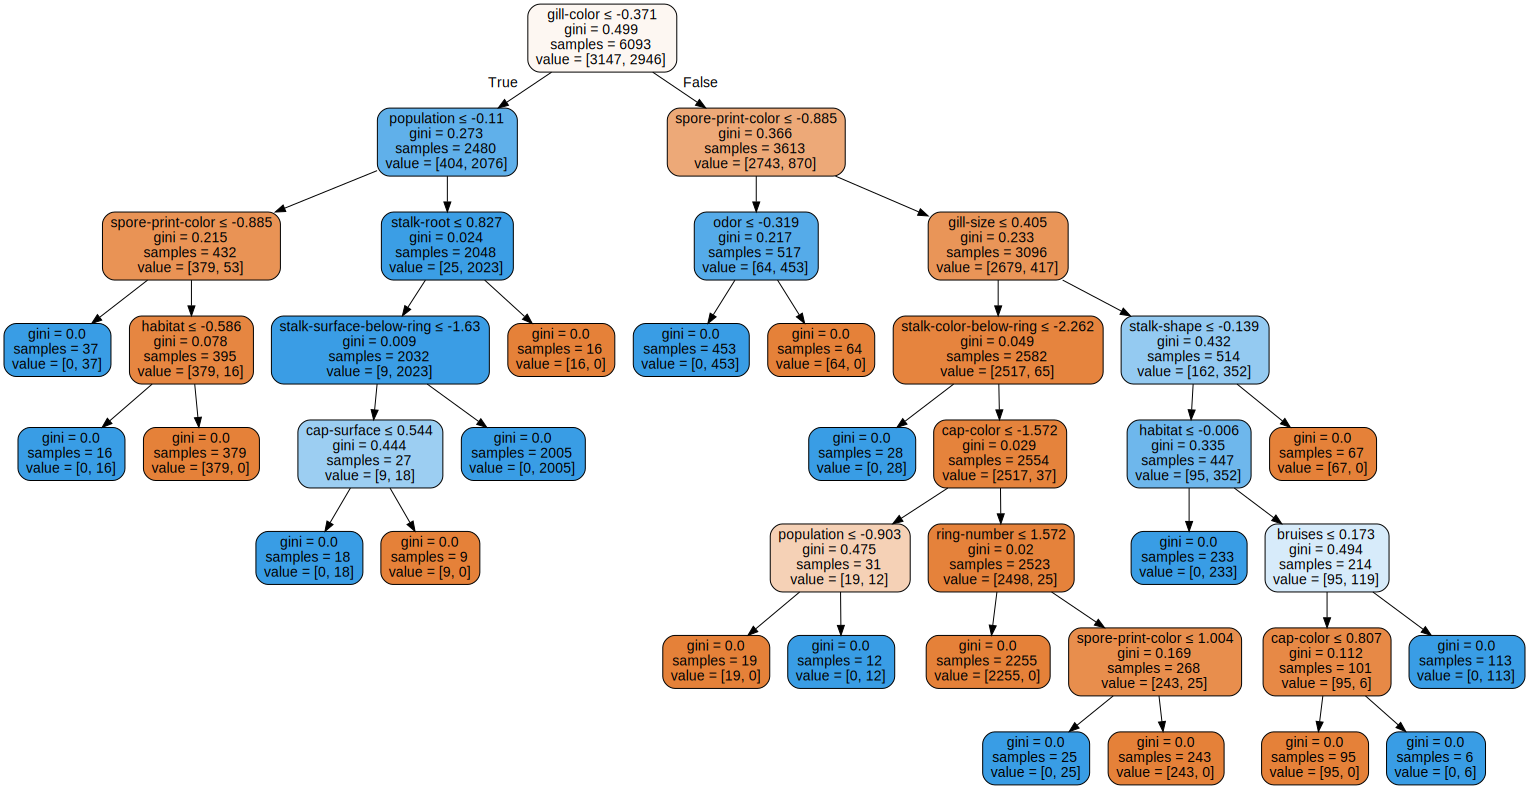

In [21]:
data = export_graphviz(classifier, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data)  
graph 

In [22]:
acc_dtc = classifier.score(X_test,Y_test)
print("Classification Accuracy : %.3f " %  acc_dtc)

Classification Accuracy : 1.000 


# Results 

Accuracy on test data :
* Logistic Regression : 95% accuracy
* SVM : 100% accuracy
* Decision Tree Classifier : 100% accuracy

Created on Wed Jun 03 15:30:04 2020

@author: Nishidh Shekhawat